# Imports and Functions

In [8]:
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
import matplotlib.path as path
from matplotlib.colors import ListedColormap
import numpy as np
from numpy import load
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KDTree
%matplotlib notebook



def Helicopter(event):
    
    if event.button == 1:
        x, y = event.xdata, event.ydata    
        global coords
        coords.append((x, y, 0))
        testpoint.append((x,y))
        ax.scatter([x], [y], c='#FF0000', s=25)
        plt.plot()
        plt.show()
        fig1.show()

            
    elif event.button == 3:
        x, y = event.xdata, event.ydata    
        coords.append((x, y, 1))
        testpoint.append((x,y))
        ax.scatter([x], [y], c='#0000FF'
                   , s=25)
        plt.plot()
        plt.show()
        fig1.show()

def find_isolated_point():
    
    tree = KDTree(X, leaf_size=40)
    maxdist = 0
    maxind = -1
    ifinal = -1
    
    num = 100
    x = np.linspace(-5, 51, num)
    y = np.linspace(-2, 53, num)
    global landpoints 
    landpoints = []
    global seapoints
    seapoints = []

    for i in range(num):
        for j in range(num):
            if wales.contains_points([(x[i],y[j])]):
                landpoints.append([x[i],y[j]])
            else:
                seapoints.append([x[i],y[j]])
                
    landpoints = np.asarray(landpoints, dtype=np.float32)

    for i in range(len(landpoints.tolist())):
        dist, ind = tree.query([landpoints.tolist()[i]], k=1)
        if dist>maxdist:
            maxdist = dist
            maxind = ind
            ifinal = i

    
    uncertainty =((maxdist[:])**2)/1+((maxdist[:])**2)
    print('The farthest point is at ',landpoints[ifinal])
    print('Its closest point is', X[maxind],'which has a distance ',maxdist[:])
    print(landpoints[ifinal][0])
    print(uncertainty)
    
    ax.scatter(landpoints[ifinal][0], landpoints[ifinal][1], c='#00FF00', s=25)

    plt.plot()

    plt.show()
    
    fig1.show()

    
    
    
def calculateModel():

    global wales
    wales = load('walesoutline1.npy')
    wales = path.Path(wales)



    Coords_df = pd.DataFrame(coords,columns=['XPos','YPos','Type'])
    DT_X_Values = Coords_df.drop(['Type'],axis=1)
    
    global X
    X = DT_X_Values.to_numpy().tolist()
    X = np.array(X)

    DT_Y_Values = Coords_df.drop(['XPos'],axis=1)
    DT_Y_Values = DT_Y_Values.drop(['YPos'],axis=1)
    y = DT_Y_Values.to_numpy().ravel()

    h = .2  # step size in the mesh
    # X = StandardScaler().fit_transform(X)

    clf = ExtraTreesClassifier(n_estimators = 100)
    clf.fit(X, y)

    x_min, x_max = -5, 51 
    y_min, y_max = -2, 53

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    Z = Z.reshape(xx.shape)

    
    df = pd.DataFrame(xx.ravel(), columns=['xx'])
    df.insert(1, 'yy',yy.ravel())
    df.insert(2, 'Z', Z.ravel())
    df.insert(3, 'Znew', 0)
    
    print(df)
    

    
    for i in range(77000):
        if (wales.contains_points([(df.iat[i,0],df.iat[i,1])])[0]):
            df.loc[i, 'Znew'] = df.iloc[i]['Z']
        else:
            df.loc[i, 'Znew'] = 0
    
    Znew = df["Znew"].to_numpy()
    Znew = Znew.reshape(xx.shape)  
    
    
    ax.contourf(xx, yy, Znew, 40, linewidths = 0, cmap=cm, alpha=
                0.4, edgecolour = None)

    plt.plot()

    plt.show()


# Plot first graph



Left Click to add a Helicopter, Right Click to add a Car


<IPython.core.display.Javascript object>


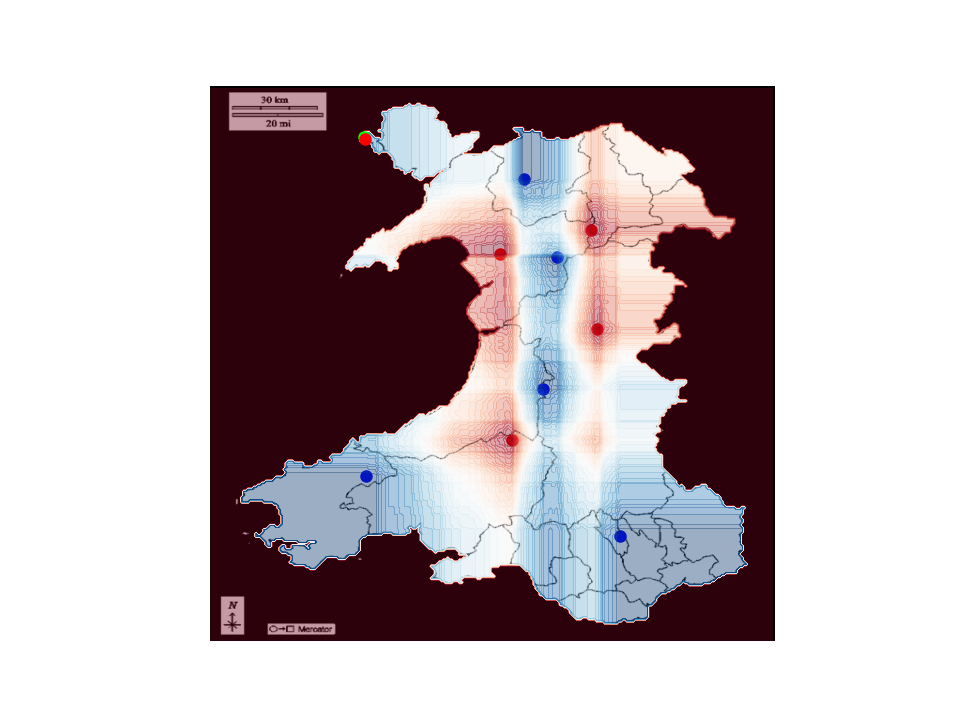

In [9]:
print("\n")                               
print("Left Click to add a Helicopter, Right Click to add a Car")

fig1, ax = plt.subplots()
ax.set_xlim(-5,51)
ax.set_ylim(-2,53)
img = plt.imread('Picture1.png');
ax.imshow(img, extent=[-5, 51, -2, 53])
plt.axis("off")

coords = []
testpoint = []

cid = fig1.canvas.mpl_connect('button_press_event', Helicopter)

fig1.show()


In [3]:
coords

[(22.253472827729723, 38.178569612048925, 0),
 (30.735615684872577, 35.20237913585844, 1),
 (26.71775854201544, 26.422617231096538, 0),
 (32.52132997058686, 22.702379135858443, 1),
 (11.836806161063052, 12.880952835083011, 0),
 (25.824901399158293, 8.714286168416344, 1),
 (37.43204425630115, 4.845238549368725, 0)]

In [12]:
calculateModel()

         xx    yy     Z  Znew
0      -5.0  -2.0  0.84     0
1      -4.8  -2.0  0.84     0
2      -4.6  -2.0  0.84     0
3      -4.4  -2.0  0.84     0
4      -4.2  -2.0  0.84     0
...     ...   ...   ...   ...
76995  50.0  52.8  0.44     0
76996  50.2  52.8  0.44     0
76997  50.4  52.8  0.44     0
76998  50.6  52.8  0.44     0
76999  50.8  52.8  0.44     0

[77000 rows x 4 columns]


KeyboardInterrupt: 

In [11]:
find_isolated_point()

The farthest point is at  [10.272727 48.      ]
Its closest point is [[[26.17212286 43.8234133 ]]] which has a distance  [[16.4388158]]
10.272727
[[540.46932977]]


In [22]:
tree = KDTree(X, leaf_size=3)
maxdist = 0
maxind = -1
ifinal = -1

num = 100
x = np.linspace(-5, 51, num)
y = np.linspace(-2, 53, num)
global landpoints 
landpoints = []
global seapoints
seapoints = []

for i in range(num):
    for j in range(num):
        if wales.contains_points([(x[i],y[j])]):
            landpoints.append([x[i],y[j]])
        else:
            seapoints.append([x[i],y[j]])

landpoints = np.asarray(landpoints, dtype=np.float32)

for i in range(len(landpoints.tolist())):
    dist, ind = tree.query([landpoints.tolist()[i]], k=1)
    if dist>maxdist:
        maxdist = dist
        maxind = ind
        ifinal = i


uncertainty1 =((maxdist[:][0][0])**2)/(1+((maxdist[:][0][0])**2))
uncertainty2 = 1-math.exp(-(maxdist[:][0][0]))

print('The farthest point is at ',landpoints[ifinal])
print('Its closest point is', X[maxind],'which has a distance ',maxdist[:])
print(landpoints[ifinal][0])
print(uncertainty)
print(uncertainty2)

ax.scatter(landpoints[ifinal][0], landpoints[ifinal][1], c='#00FF00', s=25)

plt.plot()

plt.show()

fig1.show()

The farthest point is at  [21.58586  23.555555]
Its closest point is [[[11.83928571 12.61309524]]] which has a distance  [[14.65377527]]
21.58586
0.9953646433399554
0.9999995675396861


In [23]:
#How to calculate a value for uncertainty? What function?
#Do i even need to? - No.

#instead of furthest point should we do closest to 0.. Yes - Also do a random selection from feasable space.
#Points dont update when in qt mode
#Create standalone app? 

#What frontend should i use

#plots overlap not refresh
# Make new function to plot map and points, use plt.cla(), ax.clear()



#How do we test/quantify performance



In [ ]:
#Use simulated Annealing top optimise KDtree search